<a href="https://colab.research.google.com/github/rodrigof74/reposit1/blob/main/Trabajo_Grupal_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Actividad en Grupo: Análisis de Comentarios de Clientes Utilizando Redes Neuronales Recurrentes (RNN)**

**Escenario**
Su equipo ha sido contratado por una empresa de turismo que desea categorizar automáticamente los comentarios de sus clientes en función de los sentimientos: positivos, neutrales o negativos. La empresa ha proporcionado un conjunto de datos de comentarios y clasificaciones (rating) de clientes para que su equipo lo analice.

**Objetivo**
Utilizar Redes Neuronales Recurrentes (RNN) para crear un modelo de análisis de sentimientos. Su tarea también implica interpretar los resultados para obtener conocimientos empresariales accionables.

**Tareas**

1. **Exploración de Datos**
   - Revise una muestra de comentarios. ¿Cuáles son los temas o patrones comunes?
   - Visualice la distribución de longitudes de los comentarios.
   - Visualice la distribución de las clasificaciones (positivo, neutro, negativo).



# **Librerías**

In [74]:
#Librerías para manipulación de datos y visualización
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#Librerías de procesamiento de texto (NLP)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.preprocessing.sequence import pad_sequences

#Librerías de preprocesamiento de datos
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

#Librerías para construcción de modelos con TensorFlow/Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.optimizers import Adam



# **Preparar entorno**

## **Cargar datos**

In [75]:
# Cargar los datos desde el archivo CSV
datos = pd.read_csv('Datos.csv')

## **Revisar estructuras**

In [76]:
# Mostrar las primeras filas para entender la estructura de los datos
print(datos.head())


   Unnamed: 0                                 title  rating  \
0           0                   IMPOSIBLE DESCANSAR       2   
1           1          No es oro todo lo que reluce       3   
2           2        Un buen hotel con mucho ruido.       3   
3           3  SIN CALEFACCIÓN OPERATIVA Y CON FRÍO       2   
4           4             Deja bastante que desear.       2   

                                         review_text  \
0  El fin de semana mi pareja y yo hicimos una re...   
1  El hotel en general está bien, las habtiacione...   
2  El hotel es moderno, amplio y limpio, pero no ...   
3  Calefacción averiada o no operativa. Se coment...   
4  Este hotel ha bajado notoriamente su categoria...   

                                location                hotel  label  
0  Seville_Province_of_Seville_Andalucia  Hotel_Rey_Alfonso_X      0  
1  Seville_Province_of_Seville_Andalucia  Hotel_Rey_Alfonso_X      3  
2  Seville_Province_of_Seville_Andalucia  Hotel_Rey_Alfonso_X      3  


In [77]:
print(datos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7615 entries, 0 to 7614
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   7615 non-null   int64 
 1   title        7615 non-null   object
 2   rating       7615 non-null   int64 
 3   review_text  7615 non-null   object
 4   location     6819 non-null   object
 5   hotel        6819 non-null   object
 6   label        7615 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 416.6+ KB
None


In [78]:
#identificar cuantas filas son afectadas
datos.isnull().any(axis=1).sum()

796

In [79]:
# Verificar si hay valores nulos en el dataset
print(datos.isnull().sum())

Unnamed: 0       0
title            0
rating           0
review_text      0
location       796
hotel          796
label            0
dtype: int64


**RESULTADO:**

Se observa que el DataFrame presentado tiene 7615 filas y 7 columnas. De estas, 3 son columnas de tipo int64, que contienen valores enteros, y 4 son de tipo object (cadenas de texto). Además, se identifican 2 columnas que contienen valores nulos, con 796 registros faltantes en cada una de estas variables, lo que representa un 10% de los datos en cada variable. Se observa además que esta situación afecta a ambas columnas al mismo tiempo; es decir, cuando la ubicación (location) no se registra, el nombre del hotel (hotel) tampoco está identificado. Por lo tanto, se podría indicar que el 10% de los registros presenta valores nulos en ambas variables, lo cual debe ser considerado en el proceso de imputación.

**Unnamed: 0:** Corresponde al índice, es de tipo int64 (números enteros) y no presenta valores nulos.

**title:** Corresponde a un título, es de tipo object (texto) y no presenta valores nulos.

**rating:** Corresponde a la calificación, es de tipo int64 (números enteros) y no presenta valores nulos.

**review_text:** Corresponde al detalle de la reseña, es de tipo object (texto) y no presenta valores nulos.

**hotel:** Corresponde al nombre del hotel, es de tipo object (texto) y presenta 796 valores nulos.

**location:** Corresponde al detalle de la ubicación (dirección), es de tipo object (texto) y presenta 796 valores nulos.

**label:** Corresponde a una etiqueta para clasificación, es de tipo int64 (números enteros) y no presenta  valores nulos.







## **Inputación**

In [80]:
# Eliminar filas con valores nulos en las columnas críticas
columnas_criticas = ['Unnamed: 0', 'title', 'rating', 'review_text', 'location', 'hotel']
datos_limpios = datos.dropna(subset=columnas_criticas)

# Verificar nuevamente si hay valores nulos
print(datos_limpios.isnull().sum())

Unnamed: 0     0
title          0
rating         0
review_text    0
location       0
hotel          0
label          0
dtype: int64


## **Revisar registros**

In [81]:
# Mostrar una muestra aleatoria de comentarios
muestra_comentarios = datos_limpios['review_text'].sample(10, random_state=1)
print(muestra_comentarios)


# TODO: Cuáles son los temas o patrones comunes?

313     Estancia de un solo día con mi marido y dos ni...
7520    Estuve 4 noches. Muy cálido el ambiente del ho...
5290    Magnífico hotel con una excelente ubicación. C...
6218    Nos alojamos en este hotel de 5 estrellas gran...
2754    La primera impresión fue un poco decepcionante...
3876    Hotel con muchas deficiencias. El wifi no me f...
1740    Es un hotel bien situado y aceptable, una buen...
2893    Reservamos una habitación con cama doble que f...
1513    Una cerveza 4 euros. No digo más. T cobran x l...
5115    Es un hotel increible. Sus jardines, sus patio...
Name: review_text, dtype: object


In [82]:
# Mostrar una muestra aleatoria de comentarios
muestra_comentarios = datos_limpios['review_text'].sample(10)
print(muestra_comentarios)

2126    El hotel tiene aspectos muy positivos y otros ...
3930    Pues es un hotel de los años 90 q no lo reform...
1850    La situación del hotel es perfecta.  Para nues...
918     Camas con malos colchones,imposible descansar,...
3973    Personal de recepción amable. Habitación basta...
2656    Hotel de 4 estrellas con instalaciones antigua...
5760    Es la segunda vez que venimos y realmente este...
3233    La estancia en el apartamento no ha sido lo qu...
956     Un hotel con excelente ubicación y que a pesar...
5298    Estupenda relación calidad - precio, y muy cer...
Name: review_text, dtype: object


<ipython-input-83-acdea3eef8ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_limpios.loc[:, 'longitud_comentario'] = datos_limpios['review_text'].apply(len)


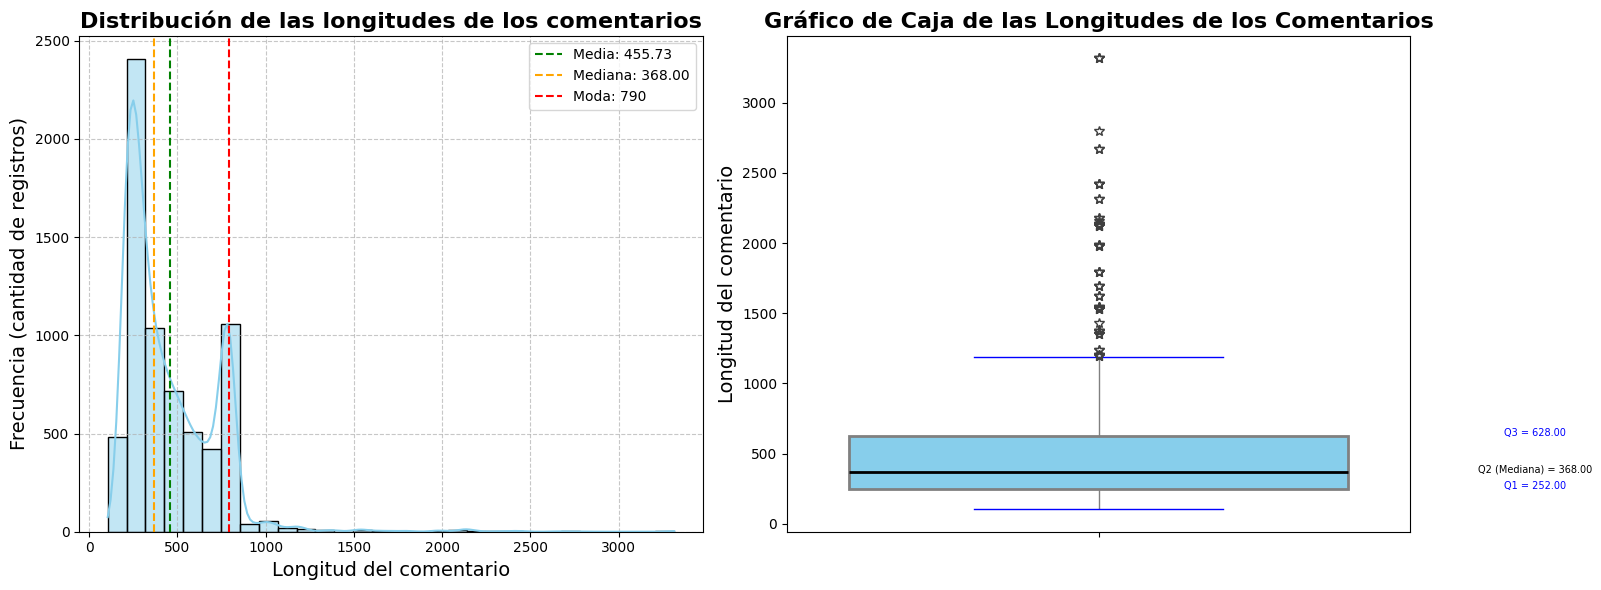

In [83]:
# Calcular las longitudes de los comentarios de forma segura usando .loc
datos_limpios.loc[:, 'longitud_comentario'] = datos_limpios['review_text'].apply(len)


# Calcular media, mediana y moda
media = datos_limpios['longitud_comentario'].mean()
mediana = datos_limpios['longitud_comentario'].median()
moda = stats.mode(datos_limpios['longitud_comentario'], keepdims=True)[0][0]
# Calcular los cuartiles Q1, Q2, Q3 y Q4
q1 = datos_limpios['longitud_comentario'].quantile(0.25)
q2 = datos_limpios['longitud_comentario'].quantile(0.50)  # Esto es equivalente a la mediana
q3 = datos_limpios['longitud_comentario'].quantile(0.75)
q4 = datos_limpios['longitud_comentario'].quantile(1.00)  # El valor máximo de los datos

# Crear una figura con dos subgráficos: uno para el histograma y otro para el boxplot
plt.figure(figsize=(16, 6))

# Subplot 1: Histograma de las longitudes de los comentarios
plt.subplot(1, 2, 1)
sns.histplot(datos_limpios['longitud_comentario'], bins=30, kde=True, color='skyblue', edgecolor='black')

# Añadir líneas verticales para la media, mediana y moda
plt.axvline(media, color='green', linestyle='--', label=f'Media: {media:.2f}')
plt.axvline(mediana, color='orange', linestyle='--', label=f'Mediana: {mediana:.2f}')
plt.axvline(moda, color='red', linestyle='--', label=f'Moda: {moda}')

# Etiquetas y leyenda
plt.title('Distribución de las longitudes de los comentarios', fontsize=16, fontweight='bold')
plt.xlabel('Longitud del comentario', fontsize=14)
plt.ylabel('Frecuencia (cantidad de registros)', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)


# Subplot 2: Gráfico de caja (boxplot)
plt.subplot(1, 2, 2)
sns.boxplot(
    y=datos_limpios['longitud_comentario'],
    flierprops={'marker': '*', 'color': 'red', 'markersize': 7},  # Outliers en rojo
    boxprops={'facecolor': 'skyblue', 'edgecolor': 'gray', 'linewidth': 2},  # Caja más gruesa para ver Q1 y Q3
    whiskerprops={'color': 'gray', 'linewidth': 1},  # Líneas de los bigotes más gruesas
    capprops={'color': 'blue', 'linewidth': 1},  # Líneas de los extremos en gris y gruesas
    medianprops={'color': 'black', 'linewidth': 2}  # Línea de la mediana en negro y más gruesa
)

# Anotar los valores de los cuartiles en el gráfico de caja
plt.text(0.7, q1, f'Q1 = {q1:.2f}', horizontalalignment='center', color='blue', fontsize=7)
plt.text(0.7, q2, f'Q2 (Mediana) = {q2:.2f}', horizontalalignment='center', color='black', fontsize=7)
plt.text(0.7, q3, f'Q3 = {q3:.2f}', horizontalalignment='center', color='blue', fontsize=7)

# Mejorar la presentación del gráfico de caja
plt.title('Gráfico de Caja de las Longitudes de los Comentarios', fontsize=16, fontweight='bold')
plt.ylabel('Longitud del comentario', fontsize=14)

# Ajustar el espaciado entre los subgráficos
plt.tight_layout()

# Mostrar ambos gráficos
plt.show()


Los datos presentan una distribución asimétrica positiva, lo que significa que la mayoría de los comentarios son más cortos, o que tienden a aagruparse menos de la media, pero hay algunos que se extienden mucho más allá de lo habitual sobre los 1500 caracteres. El histograma con KDE (curva de densidad) muestra claramente que la mayoría de los comentarios están en el rango de comentarios breves, lo que indica que predominan las longitudes cortas. Sin embargo, los comentarios más recurrentes tienen 790 caracteres, como se refleja en la moda. Además, la presencia de valores atípicos en el boxplot indica que existe un grupo de comentarios considerablemente más largos que la mayoría, lo que podría estar relacionado con comentarios más detallados o extensos en ciertas interacciones.


**Histograma de la distribución de las longitudes de los comentarios:**


La mayoría de los comentarios se concentran entre los 100 y 500 caracteres con una distribución asimétrica hacia la derecha, debido a la presencia de algunos comentarios considerablemente más largos, donde la media (455.73), indica que, en promedio, las longitudes de los comentarios se encuentran en torno a los 456 caracteres. La mediana (368.00)esto es que el 50% de los comentarios son más cortos o más largos que 368 caracteres y quer la longitud que más se repite en los dato 790 caracteress. Este valor es significativamente mayor que la mediana, lo que sugiere la existencia de un grupo de comentarios más largos y frecuentes en ese rango.  

**Boxplot (Gráfico de caja de las longitudes de los comentarios):**

se destaca una gran cantidad de outliers por encima de los 1500 caracteres, se observa ademas que el 25% de los comentarios tienen una longitud menor a 252 caracteres, mientras que el 25% más largo de los comentarios supera 628 caracteres.


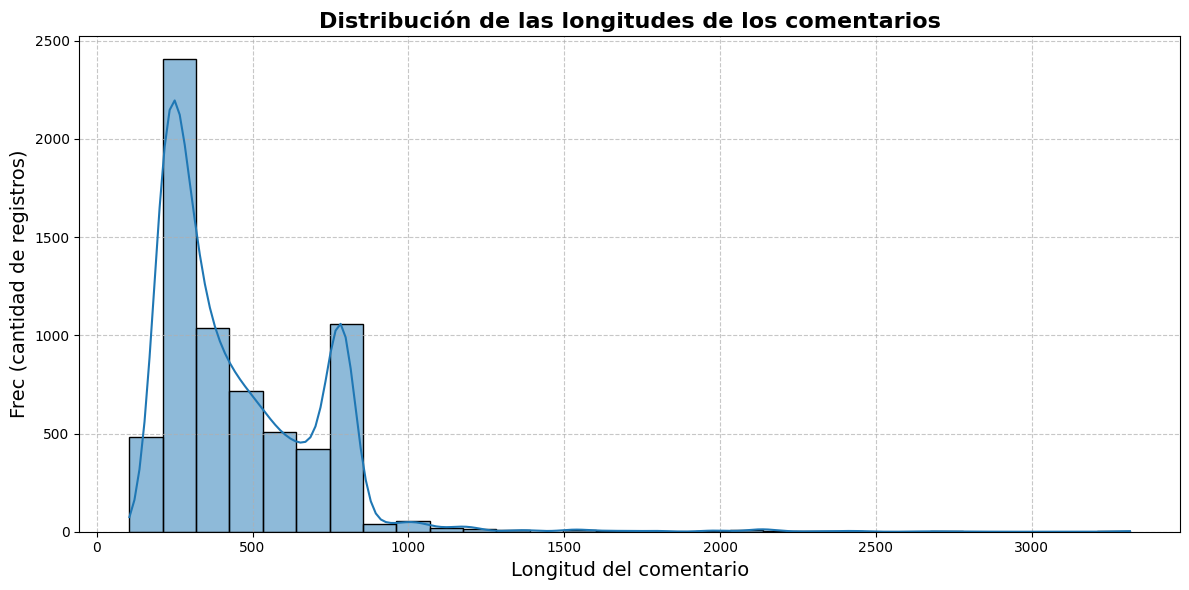

In [84]:
# Calcular las longitudes de los comentarios de forma segura usando .loc
datos_limpios.loc[:, 'longitud_comentario'] = datos_limpios['review_text'].apply(len)

# Crear el histograma de las longitudes de los comentarios
plt.figure(figsize=(12, 6))

sns.histplot(datos_limpios['longitud_comentario'], bins=30, kde=True)

# Mejorar la presentación del gráfico
plt.title('Distribución de las longitudes de los comentarios', fontsize=16, fontweight='bold')
plt.xlabel('Longitud del comentario', fontsize=14)
plt.ylabel('Frec (cantidad de registros)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)  # Añadir una cuadrícula suave
plt.tight_layout()

# Mostrar el gráfico
plt.show()


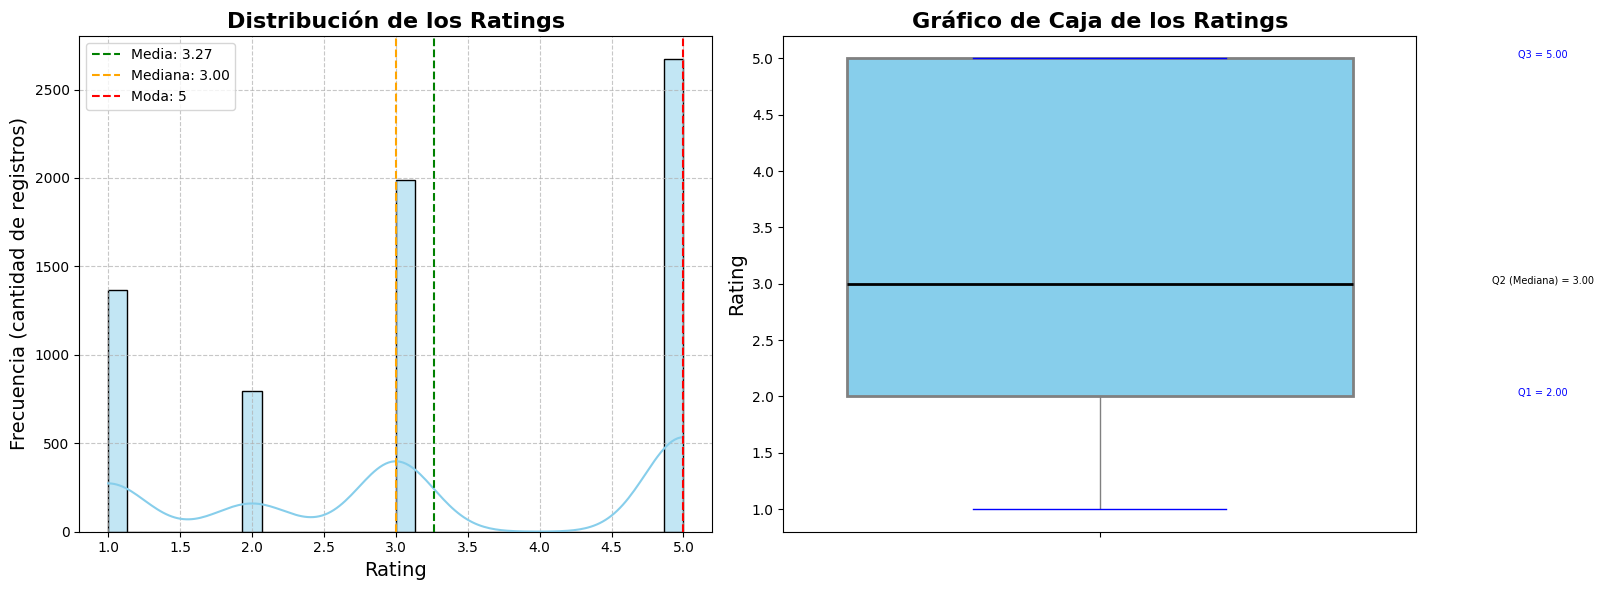

In [85]:
# Calcular la media, mediana y moda para la variable 'rating'
media = datos_limpios['rating'].mean()
mediana = datos_limpios['rating'].median()
moda = stats.mode(datos_limpios['rating'], keepdims=True)[0][0]

# Calcular los cuartiles Q1, Q2, Q3 y Q4
q1 = datos_limpios['rating'].quantile(0.25)
q2 = datos_limpios['rating'].quantile(0.50)  # Esto es equivalente a la mediana
q3 = datos_limpios['rating'].quantile(0.75)
q4 = datos_limpios['rating'].quantile(1.00)  # El valor máximo de los datos

# Crear una figura con dos subgráficos: uno para el histograma y otro para el boxplot
plt.figure(figsize=(16, 6))

# Subplot 1: Histograma de los ratings
plt.subplot(1, 2, 1)
sns.histplot(datos_limpios['rating'], bins=30, kde=True, color='skyblue', edgecolor='black')

# Añadir líneas verticales para la media, mediana y moda
plt.axvline(media, color='green', linestyle='--', label=f'Media: {media:.2f}')
plt.axvline(mediana, color='orange', linestyle='--', label=f'Mediana: {mediana:.2f}')
plt.axvline(moda, color='red', linestyle='--', label=f'Moda: {moda}')

# Etiquetas y leyenda
plt.title('Distribución de los Ratings', fontsize=16, fontweight='bold')
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frecuencia (cantidad de registros)', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)


# Subplot 2: Gráfico de caja (boxplot) de los ratings
plt.subplot(1, 2, 2)
sns.boxplot(
    y=datos_limpios['rating'],
    flierprops={'marker': '*', 'color': 'red', 'markersize': 7},  # Outliers en rojo
    boxprops={'facecolor': 'skyblue', 'edgecolor': 'gray', 'linewidth': 2},  # Caja más gruesa para ver Q1 y Q3
    whiskerprops={'color': 'gray', 'linewidth': 1},  # Líneas de los bigotes más gruesas
    capprops={'color': 'blue', 'linewidth': 1},  # Líneas de los extremos en gris y gruesas
    medianprops={'color': 'black', 'linewidth': 2}  # Línea de la mediana en negro y más gruesa
)

# Anotar los valores de los cuartiles en el gráfico de caja
plt.text(0.7, q1, f'Q1 = {q1:.2f}', horizontalalignment='center', color='blue', fontsize=7)
plt.text(0.7, q2, f'Q2 (Mediana) = {q2:.2f}', horizontalalignment='center', color='black', fontsize=7)
plt.text(0.7, q3, f'Q3 = {q3:.2f}', horizontalalignment='center', color='blue', fontsize=7)

# Mejorar la presentación del gráfico de caja
plt.title('Gráfico de Caja de los Ratings', fontsize=16, fontweight='bold')
plt.ylabel('Rating', fontsize=14)

# Ajustar el espaciado entre los subgráficos
plt.tight_layout()

# Mostrar ambos gráficos
plt.show()


se observa una distribución polarizada, donde una cantidad significativa de usuarios califican con los extremos (1 o 5), indicando una tendencia hacia experiencias muy positivas o muy negativas. Sin embargo, el hecho de que la moda sea 5 sugiere que las opiniones positivas son más comunes, aunque hay un porcentaje importante de usuarios con opiniones negativas, como lo refleja el pico en las calificaciones de 1. Esto podría estar relacionado con la percepción variable del producto o servicio evaluado.

SE recodificar los ratings en positivo (4-5), neutro (3) y negativo (1-2) es relevante porque facilita el análisis del sentimiento general de los usuarios, simplificando la interpretación en tres categorías más claras. Al agrupar las calificaciones, se pueden identificar mas fácilmente tendencias de satisfacción e insatisfacción.

**histograma de la distribución de los ratings**

La calificación más frecuente tiende a ser positiva (moda = 5), lo que sugiere que una gran parte de los usuarios tuvo una experiencia muy satisfactoria con el servicio hotelero. Sin embargo, las calificaciones de 1 y 2, que representan las evaluaciones más negativas, también tienen una frecuencia considerable, especialmente si se agrupan, lo que revela una polarización en las opiniones. Esto indica que muchos usuarios reportaron experiencias muy negativas. En consonancia con lo anterior, la media es 3.27, lo que sugiere que, en promedio, los usuarios tienden a una evaluación neutral o ligeramente positiva. Por otro lado, la mediana de 3 indica que el 50% de las evaluaciones son iguales o inferiores a este valor, lo que refuerza la idea de un equilibrio entre opiniones positivas y negativas, pero con una tendencia a ser menos negativas.

**boxplot de los ratings:**,
Se observa que el 25% de las evaluaciones son iguales o menores a 2, lo que representa a usuarios con experiencias mayormente negativas. El segundo cuartil (Q2) o mediana es 3, lo que indica que la mitad de los usuarios tiene una evaluación neutral o menor. Esta distribución sugiere una posible dicotomía en las percepciones, donde un segmento significativo de usuarios experimenta insatisfacción, mientras que la otra mitad se ubica entre la neutralidad y una mayor satisfacción.

### **Reclasificación**

In [86]:
# Definir las clasificaciones como positivo (4-5), neutro (3) y negativo (1-2)
def clasificacion_sentimiento(rating):
    if rating >= 4:
        return 'Positivo'
    elif rating == 3:
        return 'Neutro'
    else:
        return 'Negativo'

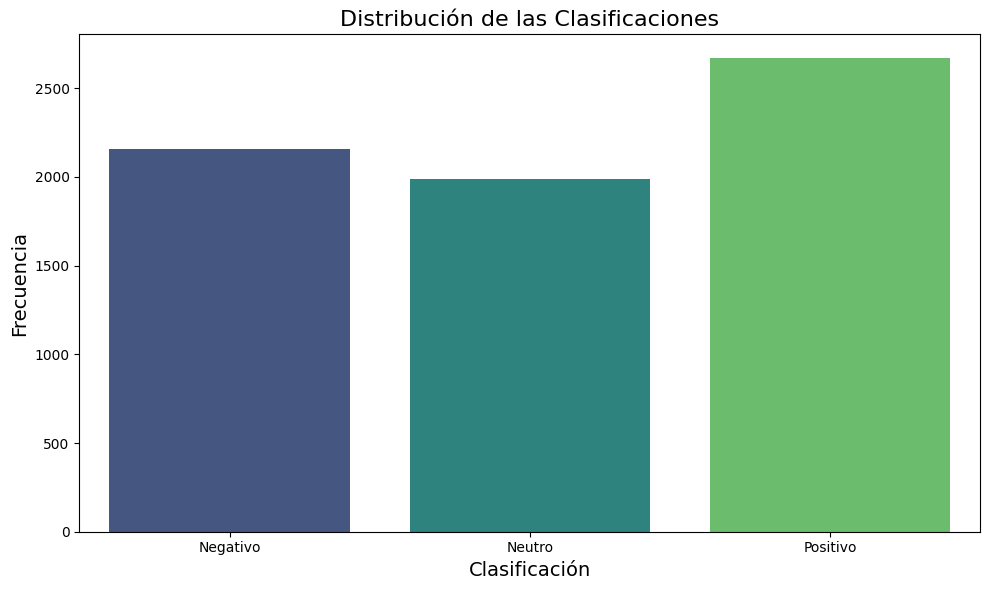

In [104]:
# Aplicar la función de clasificación al dataset
datos_limpios.loc[:, 'sentimiento'] = datos_limpios['rating'].apply(clasificacion_sentimiento)

# Crear un gráfico de barras para mostrar la distribución de las clasificaciones
plt.figure(figsize=(10, 6))

# Asignar hue a la variable 'sentimiento' y usar la paleta 'viridis'
sns.countplot(x='sentimiento', hue='sentimiento', data=datos_limpios, palette='viridis', legend=False)

# Añadir título y etiquetas
plt.title('Distribución de las Clasificaciones', fontsize=16)
plt.xlabel('Clasificación', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [103]:
# revisar distribucion
distribucion = datos_limpios['sentimiento'].value_counts()
print(distribucion)

sentimiento
Positivo    2670
Negativo    2160
Neutro      1989
Name: count, dtype: int64


muestra una ligera diferencia entre las clases, con los comentarios positivos siendo más frecuentes que los neutrales y negativos, dado que las diferencias entre clases no son extremadamente grandes (la clase positiva tiene aproximadamente  30% más que la clase neutra), no es necesario aplicar técnicas de balanceo

# **Preprocesamiento de Datos**


2. **Preprocesamiento de Datos**
   - Extraiga y Tokenice los comentarios.
   - Rellene secuencias para asegurar una longitud uniforme.
   - Convierta los valores de rating en sentimientos (positivo, neutro, negativo) y codifíquelo en valores numéricos.


preprocesar textos (en este caso, los comentarios) para su uso en modelos de aprendizaje automático transformando el texto en una representación numérica

In [88]:
# Convertir los comentarios a una lista para el tokenizador
comentarios = datos_limpios['review_text'].tolist()

# Inicializar el tokenizador
tokenizer = Tokenizer()
tokenizer.fit_on_texts(comentarios)

# Convertir los textos a secuencias de enteros
secuencias = tokenizer.texts_to_sequences(comentarios)

# Mostrar una muestra de las secuencias tokenizadas
print(secuencias[:5])


[[5, 190, 1, 170, 44, 261, 3, 129, 556, 13, 149, 6, 37, 15, 12, 5, 190, 1, 293, 3, 2817, 56, 207, 13, 51, 3, 145, 97, 22, 2652, 7, 10, 2211, 66, 9243, 19, 15, 65, 22, 357, 4, 40, 74, 16, 293, 53, 4, 2, 151, 1, 256, 40, 9, 13455, 22, 608, 27, 65, 40, 266, 18, 4, 2413, 3, 1665, 56, 95, 370, 85, 14, 422, 1, 2, 214, 12, 447, 576, 18, 4, 4689, 4, 327, 113, 13456, 6, 2, 21, 1, 632, 1, 136, 8, 43, 1370, 5, 15, 1666, 3, 180, 160, 14, 734, 62, 63, 34, 14, 2818, 3646, 666, 3, 2819, 3413, 62, 18, 4, 256, 506, 2517, 207, 318, 16, 293, 1491, 6, 8, 165, 4, 5347, 35, 6047, 24, 56, 302, 17, 23, 447, 6048, 17, 359, 7573], [5, 15, 6, 211, 33, 27, 14, 13457, 46, 1038, 3, 5, 29, 11, 9, 67, 1371, 5, 1919, 19, 4283, 1492, 3, 2, 82, 3, 2, 86, 1, 2, 82, 11, 6049, 24, 43, 60, 354, 4284, 5, 576, 11, 4, 5, 308, 8, 2126, 27, 7, 2, 21, 53, 4, 20, 9244, 2311, 5, 735, 1920, 11, 4, 8, 20, 239, 1921, 153, 301, 4, 374, 10, 2212, 6050, 6, 112, 1, 13, 3647, 1922, 6, 175, 886, 6, 47], [5, 15, 11, 525, 437, 3, 80, 24, 8, 1

In [89]:
longitud_maxima = 100

vectorize_layer = TextVectorization(
    max_tokens=5000,
    output_mode = 'int',
    output_sequence_length=longitud_maxima
)

vectorize_layer.adapt(comentarios)

secuencias = vectorize_layer(comentarios)

In [90]:
# Determinar la longitud máxima de las secuencias
#longitud_maxima = max(len(secuencia) for secuencia in secuencias)

# Rellenar las secuencias para que todas tengan la misma longitud
secuencias_padded = pad_sequences(secuencias, maxlen=longitud_maxima, padding='post')

# Mostrar una muestra de las secuencias rellenadas
print(secuencias_padded[:5])


[[   6  193    2  170   44  257    4  130  574   14  150    7   38   16
    13    6  193    2  293    4 2894   56  211   14   54    4  148   97
    23 2692    8   11 2273   67    1   20   16   66   23  351    5   41
    76   17  293   52    5    3  151    2  259   41   10    1   23  598
    28   66   41  265   19    5 2476    4 1666   56   94  369   86   15
   455    2    3  213   13  450  586   19    5 4743    5  320  112    1
     7    3   22    2  656    2  141    9   45 1370    6   16 1649    4
   185  162]
 [   6   16    7  212   34   28   15    1   46 1044    4    6   30   12
    10   68 1383    6 1928   20 3175    4    3   81    4    3   85    2
     3   81   12    1   25   45   59  350 4496    6  586   12    5    6
   297    9 2130   28    8    3   22   52    5   21    1 2356    6  725
  1925   12    5    9   21  237 1910  152  299    5  370   11 2460    1
     7  111    2   14 3639 1923    7  171  890    7   48    0    0    0
     0    0    0    0    0    0    0    0    0    0

convertir una variable categórica,  los sentimientos clasificados como "Positivo", "Neutro", o "Negativo", en valores numéricos.

In [91]:
# Aplicar la función de clasificación al dataset utilizando .loc para evitar la advertencia
datos_limpios.loc[:, 'sentimiento'] = datos_limpios['rating'].apply(clasificacion_sentimiento)

# Codificar los sentimientos en valores numéricos utilizando .loc
encoder = LabelEncoder()
datos_limpios.loc[:, 'sentimiento_numerico'] = encoder.fit_transform(datos_limpios['sentimiento'])

# Mostrar una muestra de los sentimientos codificados
print(datos_limpios[['rating', 'sentimiento', 'sentimiento_numerico']].head())


   rating sentimiento  sentimiento_numerico
0       2    Negativo                     0
1       3      Neutro                     1
2       3      Neutro                     1
3       2    Negativo                     0
4       2    Negativo                     0


<ipython-input-91-915e459fc666>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_limpios.loc[:, 'sentimiento_numerico'] = encoder.fit_transform(datos_limpios['sentimiento'])



3. **Construcción del Modelo RNN**
   - Cree un modelo secuencial.
   - Agregue capas de incrustación (embedding) para procesar las palabras tokenizadas.
   - Implemente capas LSTM o GRU para la parte recurrente.
   - Diseñe la capa de salida adecuada para un problema de clasificación de tres clases.

In [92]:
# Convertir las etiquetas a una forma categórica para la clasificación de tres clases
etiquetas_categoricas = to_categorical(datos_limpios['sentimiento_numerico'], num_classes=3)

In [93]:
# Número máximo de palabras en el tokenizador
num_palabras = len(tokenizer.word_index) + 1

# Crear el modelo
modelo = Sequential()

# Agregar la capa de incrustación (embedding)
modelo.add(Embedding(input_dim=num_palabras, output_dim=128, input_length=longitud_maxima))
modelo.add(SpatialDropout1D(0.2))

# Agregar las capas LSTM
modelo.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))

# Agregar la capa de salida (Softmax para clasificación en tres clases)
modelo.add(Dense(3, activation='softmax'))

# Compilar el modelo
modelo.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Resumen del modelo
modelo.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

#**Entrenamiento y Evaluación del Modelo**


   - Divida el conjunto de datos en entrenamiento, validación y prueba.
   - Entrene el modelo y valide su rendimiento.
   - Pruebe el modelo en el conjunto de prueba e interprete los resultados.

In [94]:
# Dividir los datos en entrenamiento (80%), validación (10%) y prueba (10%)
X_temp, X_test, y_temp, y_test = train_test_split(secuencias_padded, etiquetas_categoricas, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_valid.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (3068, 100)
Tamaño del conjunto de validación: (3069, 100)
Tamaño del conjunto de prueba: (682, 100)


In [95]:
# Ajustar el modelo con los datos de entrenamiento y validación
historial = modelo.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_valid, y_valid), verbose=1)


Epoch 1/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 29s 266ms/step - accuracy: 0.4633 - loss: 1.0655 - val_accuracy: 0.5031 - val_loss: 1.0055
Epoch 2/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 40s 258ms/step - accuracy: 0.5167 - loss: 0.9916 - val_accuracy: 0.6338 - val_loss: 0.8300
Epoch 3/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 26s 265ms/step - accuracy: 0.6036 - loss: 0.8224 - val_accuracy: 0.5507 - val_loss: 0.8578
Epoch 4/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 40s 259ms/step - accuracy: 0.5472 - loss: 0.9992 - val_accuracy: 0.5393 - val_loss: 0.9765
Epoch 5/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 46s 310ms/step - accuracy: 0.5673 - loss: 0.9494 - val_accuracy: 0.5490 - val_loss: 0.9604
Epoch 6/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 37s 273ms/step - accuracy: 0.5918 - loss: 0.9114 - val_accuracy: 0.6044 - val_loss: 0.8361
Epoch 7/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 25s 260ms/step - accuracy: 0.6179 - loss: 0.7842 - val_accuracy: 0.5849 - val_loss: 0.7970
Epoch 8/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 42s 273ms/step - accuracy: 0.6802 - loss: 0.6588 - val_accu

In [96]:
# Evaluar el modelo en el conjunto de prueba
perdida, precision = modelo.evaluate(X_test, y_test, verbose=1)

print("Pérdida en el conjunto de prueba:", perdida)
print("Precisión en el conjunto de prueba:", precision)

# Hacer predicciones en el conjunto de prueba
predicciones = modelo.predict(X_test)
predicciones_clases = predicciones.argmax(axis=1)
y_test_clases = y_test.argmax(axis=1)

# Mostrar la matriz de confusión y el reporte de clasificación para interpretar los resultados
from sklearn.metrics import confusion_matrix, classification_report

# Matriz de confusión
matriz_confusion = confusion_matrix(y_test_clases, predicciones_clases)
print("Matriz de Confusión:")
print(matriz_confusion)

# Reporte de clasificación
reporte_clasificacion = classification_report(y_test_clases, predicciones_clases, target_names=['Negativo', 'Neutro', 'Positivo'])
print("Reporte de Clasificación:")
print(reporte_clasificacion)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7829 - loss: 0.7491
Pérdida en el conjunto de prueba: 0.7612419128417969
Precisión en el conjunto de prueba: 0.774193525314331
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step
Matriz de Confusión:
[[178  36   2]
 [ 65 127  24]
 [ 15  12 223]]
Reporte de Clasificación:
              precision    recall  f1-score   support

    Negativo       0.69      0.82      0.75       216
      Neutro       0.73      0.59      0.65       216
    Positivo       0.90      0.89      0.89       250

    accuracy                           0.77       682
   macro avg       0.77      0.77      0.76       682
weighted avg       0.78      0.77      0.77       682



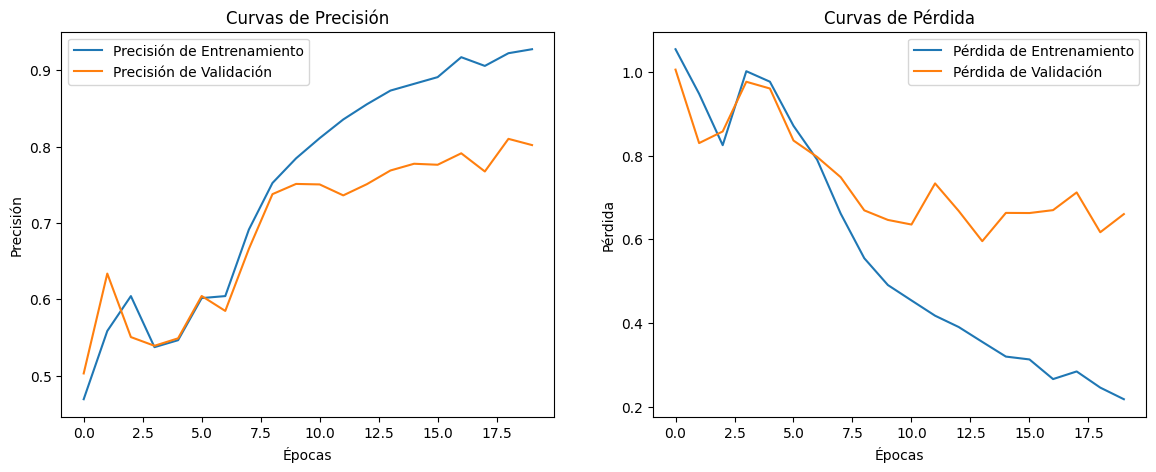

In [97]:
import matplotlib.pyplot as plt

# Obtener los valores de precisión y pérdida del historial de entrenamiento
precision_entrenamiento = historial.history['accuracy']
precision_validacion = historial.history['val_accuracy']
perdida_entrenamiento = historial.history['loss']
perdida_validacion = historial.history['val_loss']

# Crear las curvas de precisión
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(precision_entrenamiento, label='Precisión de Entrenamiento')
plt.plot(precision_validacion, label='Precisión de Validación')
plt.title('Curvas de Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Crear las curvas de pérdida
plt.subplot(1, 2, 2)
plt.plot(perdida_entrenamiento, label='Pérdida de Entrenamiento')
plt.plot(perdida_validacion, label='Pérdida de Validación')
plt.title('Curvas de Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Mostrar las gráficas
plt.show()



5. **Análisis y Recomendaciones Empresariales**
   - Analice las clasificaciones incorrectas. ¿Existen ciertos tipos de comentarios con los que el modelo tiene dificultades?
   - ¿Cómo puede la empresa utilizar los resultados del modelo para mejorar sus servicios o productos?
   - ¿Cuáles son las posibles limitaciones de confiar en este modelo para tomar decisiones comerciales?


In [98]:
# Hacer predicciones en el conjunto de prueba
predicciones = modelo.predict(X_test)
predicciones_clases = predicciones.argmax(axis=1)  # Convertir las predicciones probabilísticas a etiquetas
y_test_clases = y_test.argmax(axis=1)  # Obtener las etiquetas verdaderas del conjunto de prueba


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


In [99]:
# Identificar las clasificaciones incorrectas
incorrectos = np.where(predicciones_clases != y_test_clases)[0]
print(f"Número de clasificaciones incorrectas: {len(incorrectos)}")


Número de clasificaciones incorrectas: 154


In [100]:
# Mostrar algunos de los comentarios mal clasificados
for i in incorrectos[:5]:  # Mostrar los primeros 5
    print(f"\nÍndice: {i}")
    print("Comentario:", comentarios[i])
    print("Clase Verdadera:", encoder.inverse_transform([y_test_clases[i]])[0])
    print("Clase Predicha:", encoder.inverse_transform([predicciones_clases[i]])[0])



Índice: 1
Comentario: El hotel en general está bien, las habtiaciones son espaciosas y el personal es muy amable (sobretodo el encargado del roof-top y la piscina) y la zona de la piscina es curiosa. Pero tiene dos grandes fallos: El primero es que el wifi no llegaba bien a la habitación ya que se cortaba continuamente. El segundo fallo es que no se les ocurre otra cosa que poner un edredón nórdico en vez de una sábana fina en pleno agosto en Sevilla.
Clase Verdadera: Neutro
Clase Predicha: Negativo

Índice: 2
Comentario: El hotel es moderno, amplio y limpio, pero no hemos podido disfrutar de la experiencia porque con tanto ruido no hemos podido descansar. Además la piscina estaba llena de gente y no la hemos podido usar. Los empleados muy amables y la ubicación perfecta.
Clase Verdadera: Negativo
Clase Predicha: Neutro

Índice: 8
Comentario: Lamentable elegir un hotel de cuatro estrellas y que te adjudiquen una habitación sucia, otra ocupada con cliente limpio y la tercera sucia. Que

In [101]:
# Contar las clasificaciones incorrectas por clase verdadera y clase predicha
from collections import Counter
import pandas as pd

clasificaciones_incorrectas = pd.DataFrame({
    'Índice': incorrectos,
    'Comentario': [" ".join(comentarios[i] ) for i in incorrectos],
    'Clase Verdadera': [encoder.inverse_transform([y_test_clases[i]])[0] for i in incorrectos],
    'Clase Predicha': [encoder.inverse_transform([predicciones_clases[i]])[0] for i in incorrectos]
})

# Contar las clasificaciones incorrectas por combinación de clase verdadera y predicha
conteo_incorrectos = clasificaciones_incorrectas.groupby(['Clase Verdadera', 'Clase Predicha']).size().unstack(fill_value=0)
print(conteo_incorrectos)


Clase Predicha   Negativo  Neutro  Positivo
Clase Verdadera                            
Negativo                0      36         2
Neutro                 65       0        24
Positivo               15      12         0



6. **Presentación**
   - Prepare una presentación de su análisis, resultados y recomendaciones.
   - Asegúrese de interpretar los resultados en un contexto empresarial.
